# 제약조건을 매트릭스로 표현

In [ ]:
# !pip install ortoolpy

## 문제
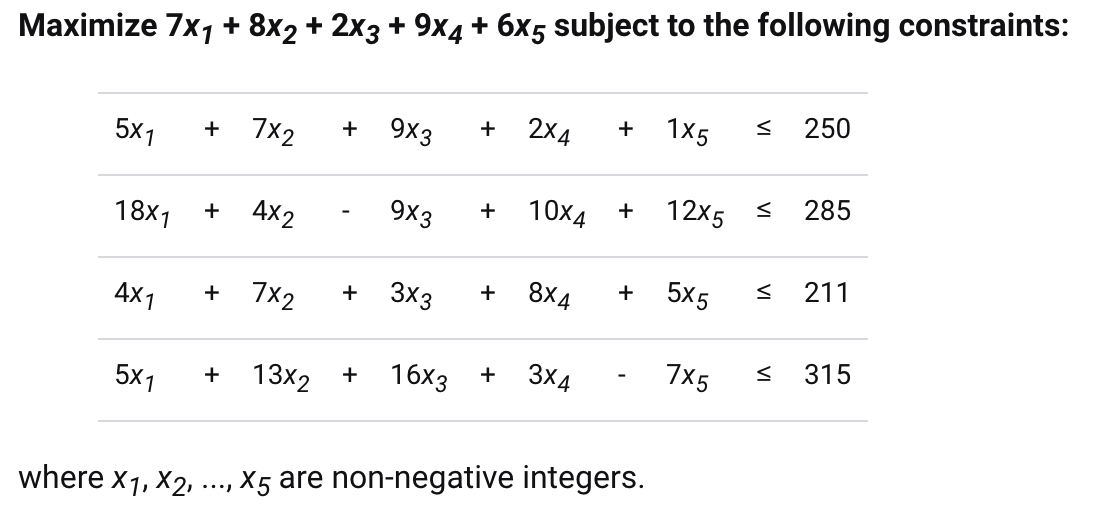

In [1]:
data = {}
data['constraint_coeffs'] = [
  [5, 7, 9, 2, 1],
  [18, 4, -9, 10, 12],
  [4, 7, 3, 8, 5],
  [5, 13, 16, 3, -7],
]
data['bounds'] = [250, 285, 211, 315]
data['obj_coeffs'] = [7, 8, 2, 9, 6]
data['num_vars'] = 5
data['num_constraints'] = 4

In [2]:
data

{'constraint_coeffs': [[5, 7, 9, 2, 1],
  [18, 4, -9, 10, 12],
  [4, 7, 3, 8, 5],
  [5, 13, 16, 3, -7]],
 'bounds': [250, 285, 211, 315],
 'obj_coeffs': [7, 8, 2, 9, 6],
 'num_vars': 5,
 'num_constraints': 4}

In [7]:
from ortools.linear_solver import pywraplp
solver = pywraplp.Solver.CreateSolver('simple_mip_program', 'CBC')

In [8]:
infinity = solver.infinity()
x = {}
for j in range(data['num_vars']):
  x[j] = solver.IntVar(0, infinity, 'x[%i]' % j)
print('Number of variables =', solver.NumVariables())

Number of variables = 5


In [9]:
for i in range(data['num_constraints']):
  constraint = solver.RowConstraint(0, data['bounds'][i], '')
  for j in range(data['num_vars']):
    constraint.SetCoefficient(x[j], data['constraint_coeffs'][i][j])
print('Number of constraints =', solver.NumConstraints())

Number of constraints = 4


In [10]:
objective = solver.Objective()
for j in range(data['num_vars']):
  objective.SetCoefficient(x[j], data['obj_coeffs'][j])
objective.SetMaximization()

In [13]:
status = solver.Solve()
if status == pywraplp.Solver.OPTIMAL:
  print('Objective value =', solver.Objective().Value())
  for j in range(data['num_vars']):
    print(x[j].name(), ' = ', x[j].solution_value())
else:
  print('The problem does not have an optimal solution.')

Objective value = 260.0
x[0]  =  10.0
x[1]  =  16.0
x[2]  =  4.0
x[3]  =  4.0
x[4]  =  3.0
